In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("housingUnits.csv")

# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("\nPreview of the dataset:")
print(data.head())
print("\nSummary statistics of the dataset:")
print(data.describe())


Shape of the dataset: (20640, 8)

Preview of the dataset:
   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                  41          880             223         322         126   
1                  21         7099            1338        2401        1138   
2                  52         1467             328         496         177   
3                  52         1274             293         558         219   
4                  52         1627             357         565         259   

   median_income  ocean_proximity  median_house_value  
0       208.1300                1              452600  
1       207.5350                1              358500  
2       181.4350                1              352100  
3       141.0775                1              341300  
4        96.1550                1              342200  

Summary statistics of the dataset:
       housing_median_age   total_rooms  total_bedrooms    population  \
count        20640.000000  2

In [2]:
# Question 1

from sklearn.preprocessing import StandardScaler

# Standardization of predictor variables 2 and 3 (total number of rooms and number of bedrooms): 

# Select predictor variables 2 and 3
predictors_2_3 = data[['total_rooms', 'total_bedrooms']]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the predictor variables
predictors_2_3_standardized = scaler.fit_transform(predictors_2_3)

# Convert the standardized predictors back to a DataFrame
predictors_2_3_standardized_df = pd.DataFrame(predictors_2_3_standardized, columns=['total_rooms_standardized', 'total_bedrooms_standardized'])
predictors_2_3_standardized_df


,total_rooms_standardized,total_bedrooms_standardized
0,-0.804819,-0.804161
1,2.045890,2.044708
2,-0.535746,-0.535882
3,-0.624215,-0.625308
4,-0.462404,-0.461786
...,...,...
20635,-0.444985,-0.443900
20636,-0.888704,-0.888477
20637,-0.174995,-0.175621
20638,-0.355600,-0.354474


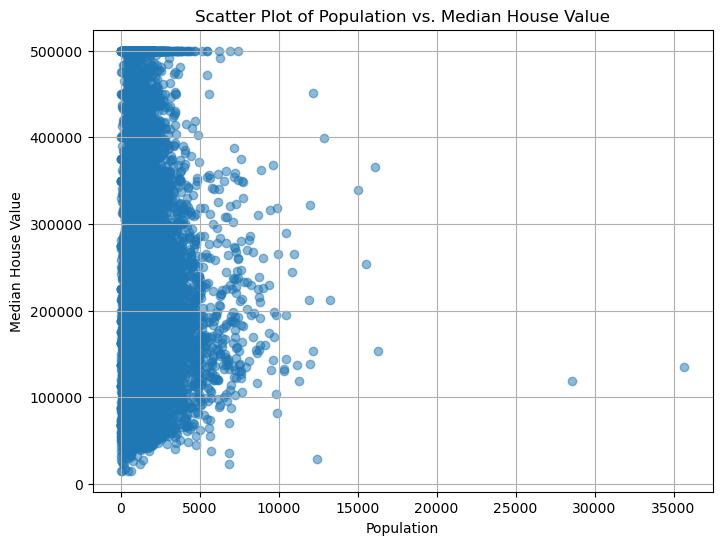

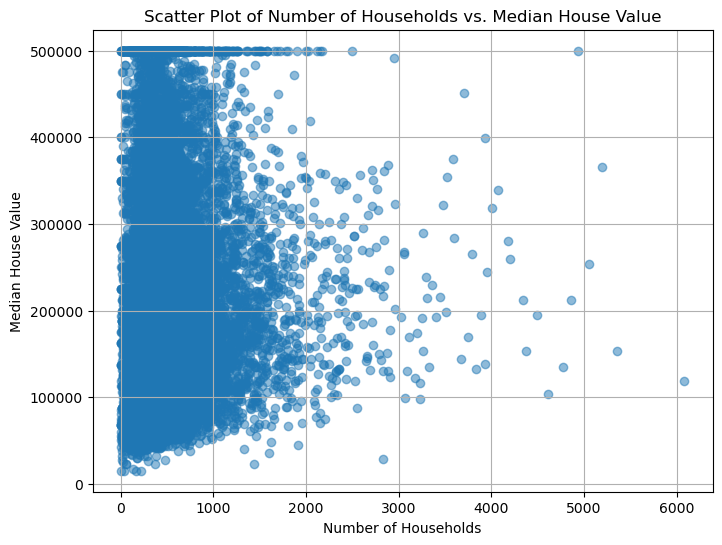

In [3]:
# Question 1
import matplotlib.pyplot as plt

# Plot scatter plot of population vs. median house value
plt.figure(figsize=(8, 6))
plt.scatter(data['population'], data['median_house_value'], alpha=0.5)
plt.title('Scatter Plot of Population vs. Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

# Plot scatter plot of number of households vs. median house value
plt.figure(figsize=(8, 6))
plt.scatter(data['households'], data['median_house_value'], alpha=0.5)
plt.title('Scatter Plot of Number of Households vs. Median House Value')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()


In [4]:
# Question 1

# Exploration of predictors 4 and 5 
# (population in the block and number of households in the block) and consideration of their potential usefulness:

# Select predictor variables 4 and 5
predictors_4_5 = data[['population', 'households']]

# Calculate correlation between predictor variables 4 and 5
correlation_4_5 = predictors_4_5.corr()

# Print correlation matrix
print("Correlation between population and households:")
print(correlation_4_5)


Correlation between population and households:
            population  households
population    1.000000    0.907222
households    0.907222    1.000000


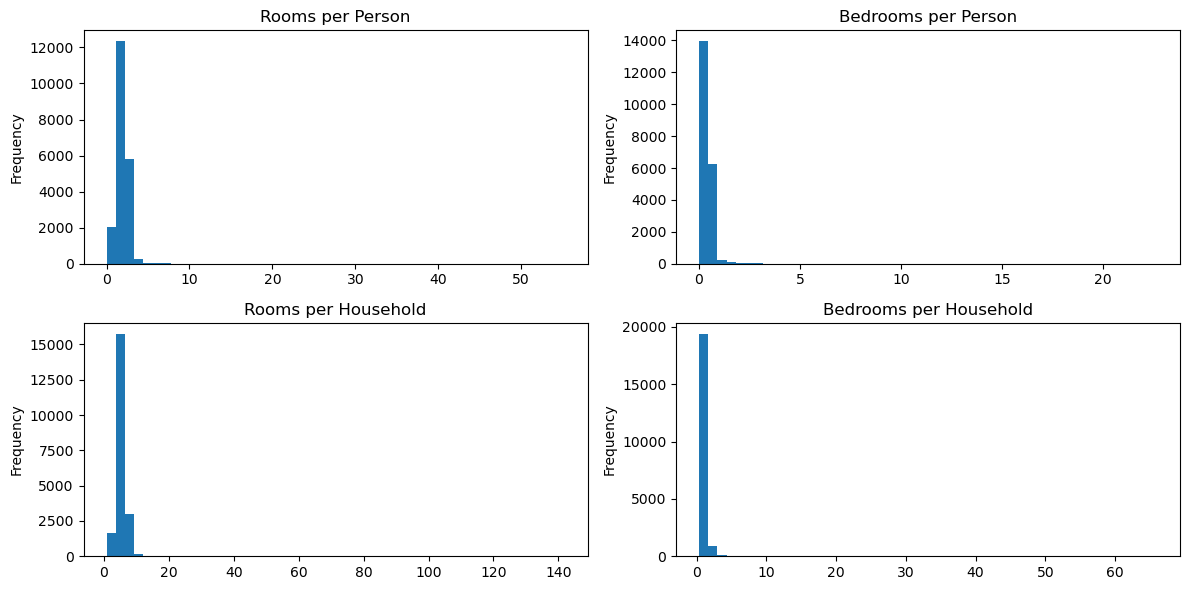

In [5]:
# Question 2

# Calculate ratios of total rooms and total bedrooms to population
data['rooms_per_person'] = data['total_rooms'] / data['population']
data['bedrooms_per_person'] = data['total_bedrooms'] / data['population']

# Calculate ratios of total rooms and total bedrooms to households
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']

# Plot distributions of the ratios
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
data['rooms_per_person'].plot(kind='hist', bins=50, title='Rooms per Person')

plt.subplot(2, 2, 2)
data['bedrooms_per_person'].plot(kind='hist', bins=50, title='Bedrooms per Person')

plt.subplot(2, 2, 3)
data['rooms_per_household'].plot(kind='hist', bins=50, title='Rooms per Household')

plt.subplot(2, 2, 4)
data['bedrooms_per_household'].plot(kind='hist', bins=50, title='Bedrooms per Household')

plt.tight_layout()
plt.show()


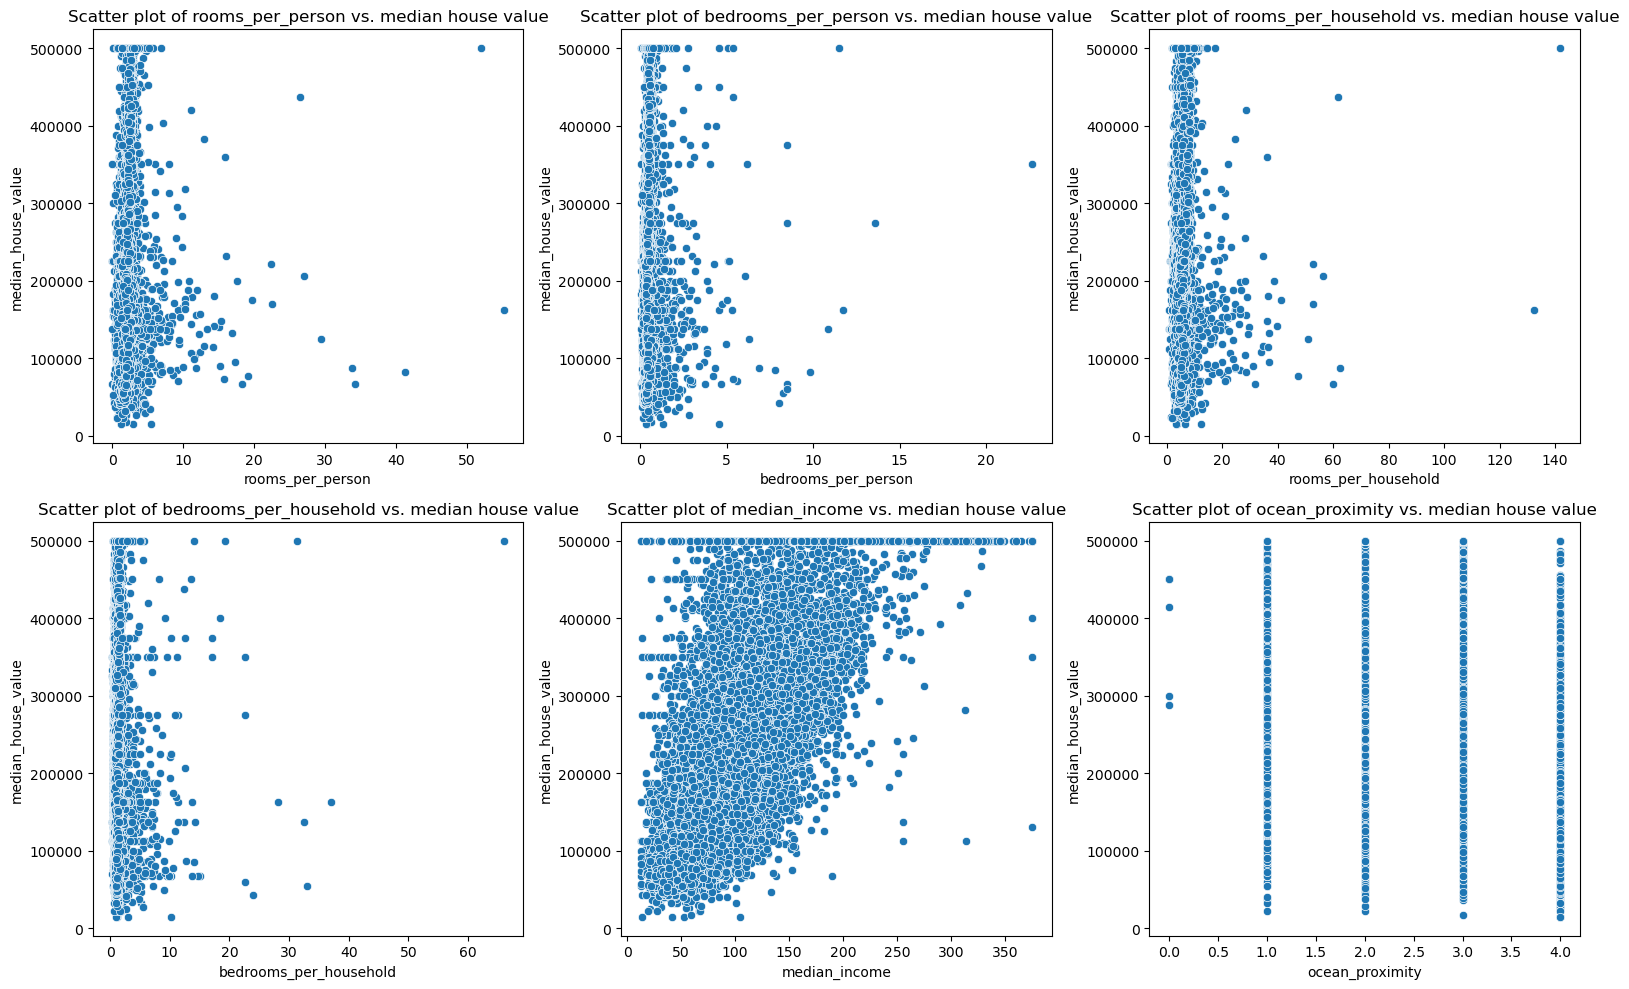

In [6]:
# Question 3

import seaborn as sns
import matplotlib.pyplot as plt

# Define predictor and target variables
X = data[['rooms_per_person', 'bedrooms_per_person', 'rooms_per_household', 'bedrooms_per_household', 'median_income', 'ocean_proximity']]
y = data['median_house_value']

# Plot scatter plots for each predictor variable against median house value
plt.figure(figsize=(16, 10))
for i, column in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'Scatter plot of {column} vs. median house value')

plt.tight_layout()
plt.show()


In [7]:
# Question 4

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model using all predictors
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(X_train, y_train)

# Predict the median house value using the multiple regression model
y_pred_multiple = multiple_regression_model.predict(X_test)

# Fit a simple linear regression model using the single best predictor
best_predictor = X_train['median_income'].values.reshape(-1, 1)
simple_regression_model = LinearRegression()
simple_regression_model.fit(best_predictor, y_train)

# Predict the median house value using the simple regression model
y_pred_simple = simple_regression_model.predict(X_test['median_income'].values.reshape(-1, 1))

# Calculate R-squared for both models
r2_multiple = r2_score(y_test, y_pred_multiple)
r2_simple = r2_score(y_test, y_pred_simple)

print(r2_multiple)
print(r2_simple)

0.5974150162494976
0.45885918903846656


In [8]:
#Question 5

# Calculate correlation matrix
correlation_matrix = data[['rooms_per_person', 'bedrooms_per_person', 'rooms_per_household', 'bedrooms_per_household']].corr()

# Print correlation matrix
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                        rooms_per_person  bedrooms_per_person  \
rooms_per_person                1.000000             0.641464   
bedrooms_per_person             0.641464             1.000000   
rooms_per_household             0.887282             0.551630   
bedrooms_per_household          0.436446             0.782395   

                        rooms_per_household  bedrooms_per_household  
rooms_per_person                   0.887282                0.436446  
bedrooms_per_person                0.551630                0.782395  
rooms_per_household                1.000000                0.518724  
bedrooms_per_household             0.518724                1.000000  


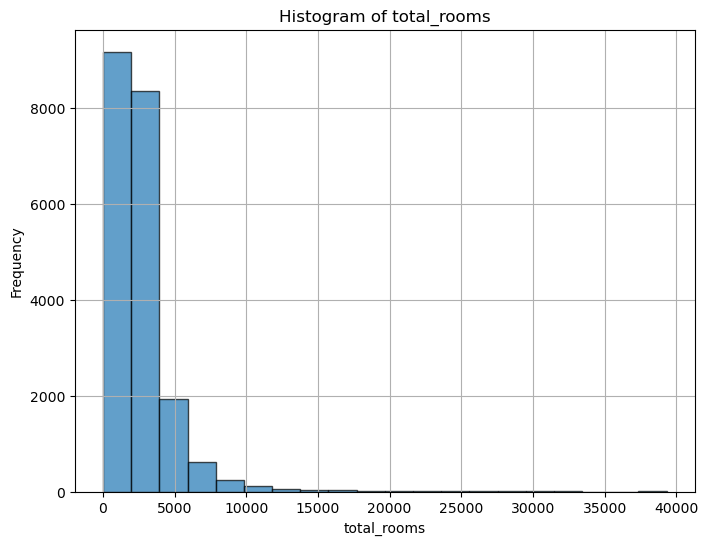

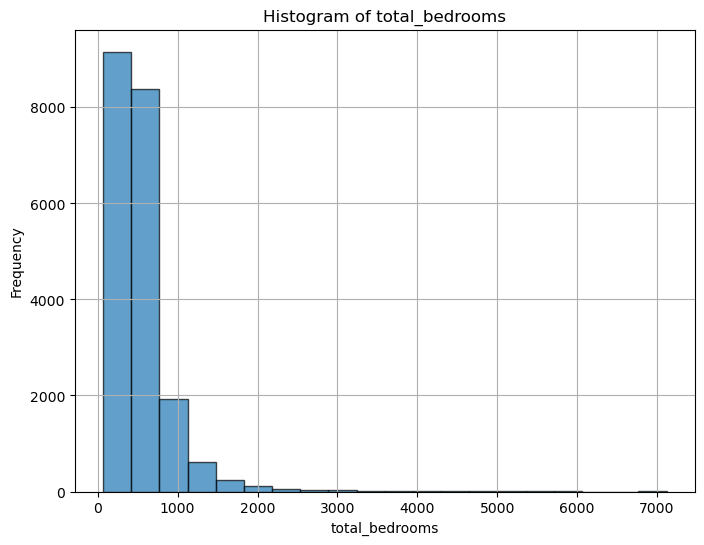

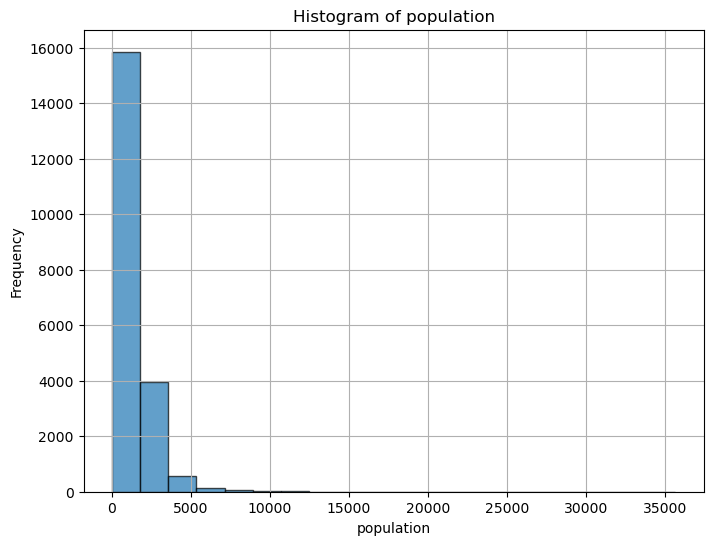

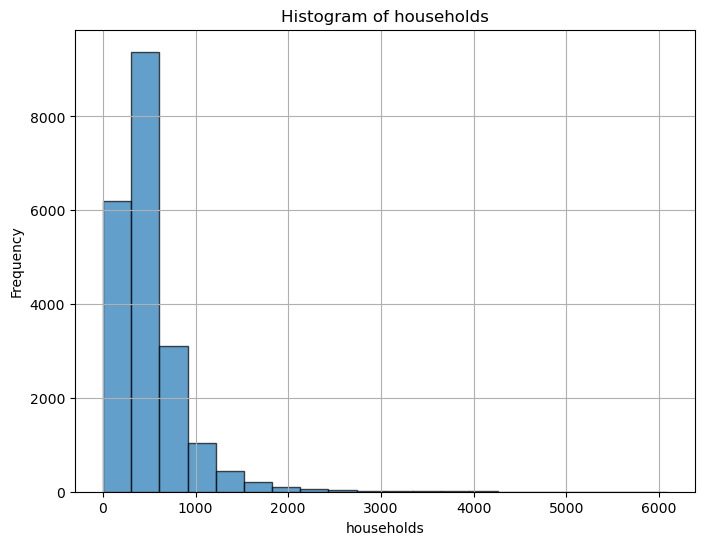

Skewness:
total_rooms       4.147042
total_bedrooms    4.147075
population        4.935500
households        3.410190
dtype: float64

Kurtosis:
total_rooms       32.622732
total_bedrooms    32.623118
population        73.535009
households        22.052354
dtype: float64


In [11]:
# Extra Credit 1

import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
variables = data[['total_rooms', 'total_bedrooms', 'population', 'households']]
for column in variables.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(variables[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
skewness = variables.apply(skew)
kurtosis_value = variables.apply(kurtosis)
print("Skewness:")
print(skewness)
print()
print("Kurtosis:")
print(kurtosis_value)


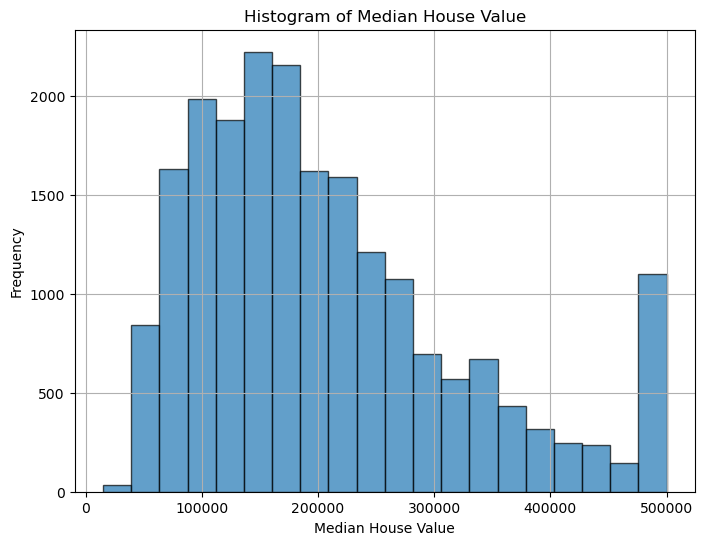

Skewness of Median House Value: 0.9776922140978416
Kurtosis of Median House Value: 0.3275001388119616


In [12]:
# Extra Credit 

import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

result = data['median_house_value']

plt.figure(figsize=(8, 6))
plt.hist(result, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
skewness = skew(result)
kurtosis_value = kurtosis(result)

print("Skewness of Median House Value:", skewness)
print("Kurtosis of Median House Value:", kurtosis_value)
